In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Data

In [2]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

df = pd.read_csv('titanic.csv', 
                 usecols = num_cols+cat_cols+[target])

X = df.copy()
y = X.pop(target)

X.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
870,3,male,26.0,0,0,7.8958,S
657,3,female,32.0,1,1,15.5000,Q
93,3,male,26.0,1,2,20.5750,S
233,3,female,5.0,4,2,31.3875,S
557,1,male,NaN,0,0,227.5250,C


# Cleaning 

In [3]:
X['Sex'] = X['Sex'].map({'male':0, 'female':1})
X['Embarked'] = X['Embarked'].map({'S':1, 'C':2, 'Q':3})

X = X.fillna(X.mode().loc[0])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,2.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,1.0


# Model

In [4]:
from lightgbm import LGBMClassifier

In [5]:
model = LGBMClassifier()
model.fit(X, y)
model.score(X, y)

0.9472502805836139

# SHAP

In [6]:
import shap
shap.initjs()

In [7]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Local Explanation 

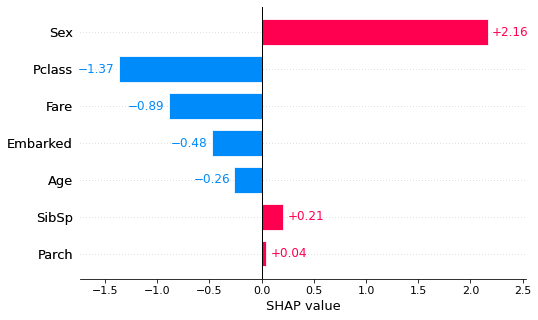

In [8]:
passenger_id = 100
shap.plots.bar(shap_values[passenger_id, :, 1], max_display=None)

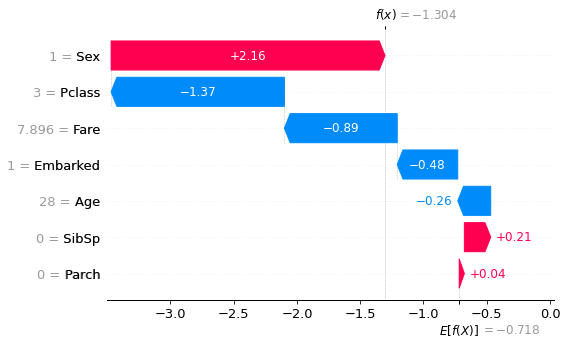

In [9]:
shap.plots.waterfall(shap_values[passenger_id, :, 1])

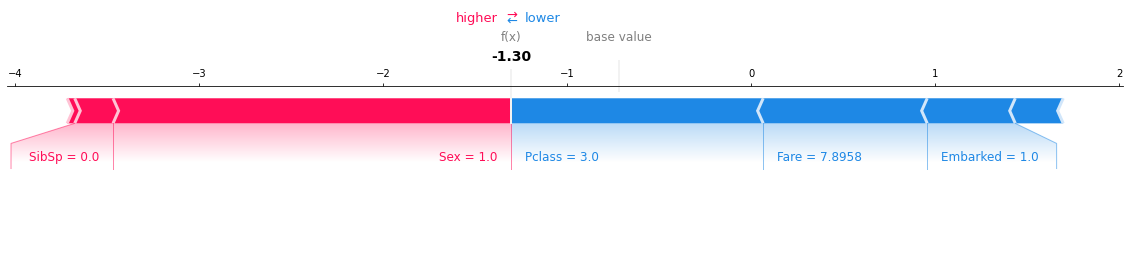

In [10]:
shap.plots.force(shap_values.base_values[passenger_id][1], 
                 shap_values.values[passenger_id][:, 1], 
                 X.iloc[passenger_id], matplotlib=True)

# Feature Importance 

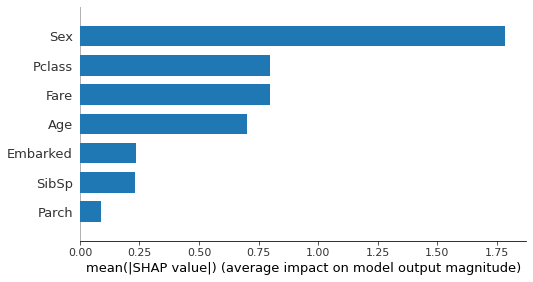

In [11]:
shap.summary_plot(shap_values[:, :, 1], plot_type='bar', color='tab:blue')

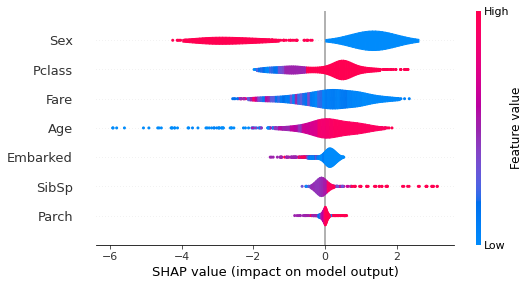

In [12]:
shap.summary_plot(shap_values[:, :, 0], plot_type='violin')

# Partial Dependence 

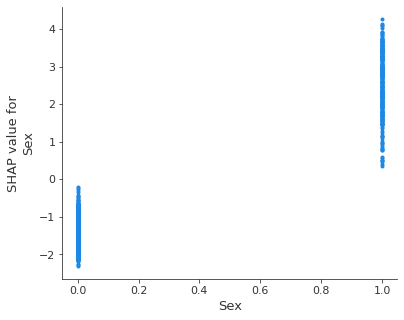

In [13]:
shap.dependence_plot(1, shap_values.values[:, :, 1], X, 
                     interaction_index=None)

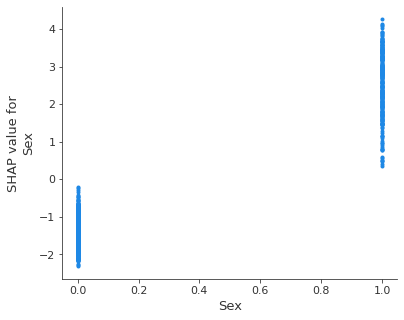

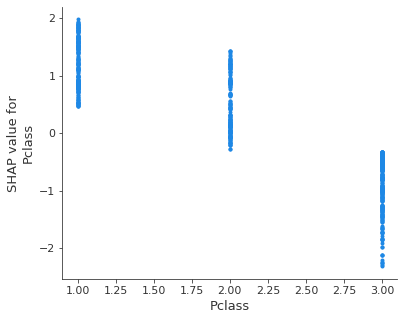

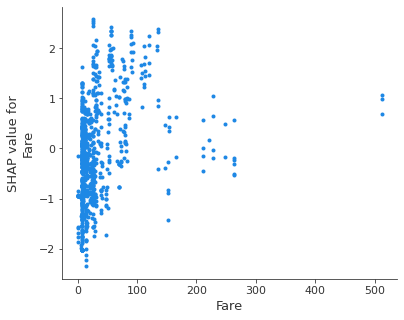

In [14]:
for i in range(len(X.columns[:3])):
    shap.dependence_plot('rank({})'.format(i), shap_values.values[:, :, 1], X, 
                         interaction_index=None
                        )

# Embeding 

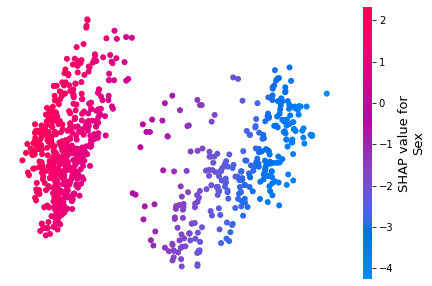

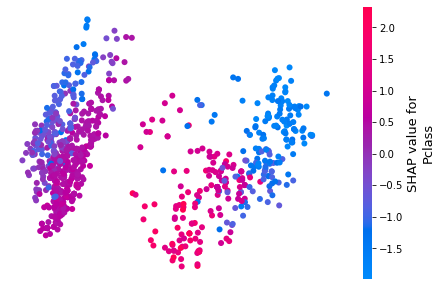

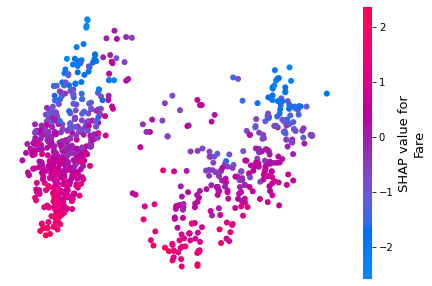

In [15]:
for i in range(len(X.columns[:3])):
        shap.embedding_plot('rank({})'.format(i), shap_values.values[:, :, 0], 
                        feature_names=X.columns)